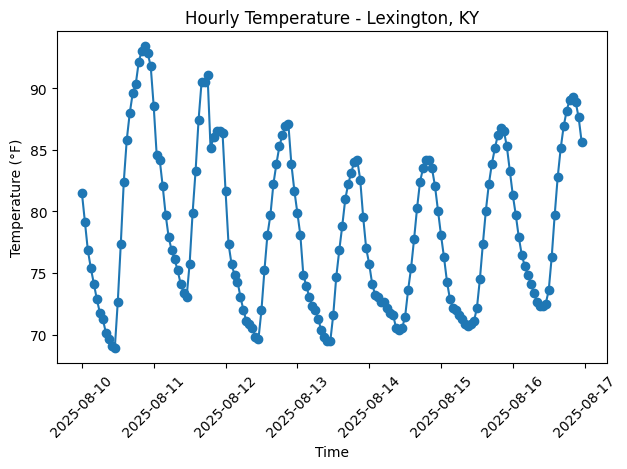

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Lexington, KY coordinates
latitude = 38.0406
longitude = -84.5037

# API endpoint
url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude={latitude}&longitude={longitude}&hourly=temperature_2m"
)

# Make the request
response = requests.get(url)
data = response.json()

# Extract hourly data
times = data["hourly"]["time"]
temps_c = data["hourly"]["temperature_2m"]

# Convert °C to °F
temps_f = [(temp * 9/5) + 32 for temp in temps_c]

# Create DataFrame
df = pd.DataFrame({"Time": times, "Temperature (°F)": temps_f})

# Convert time to datetime
df["Time"] = pd.to_datetime(df["Time"])

# Plot
plt.plot(df["Time"], df["Temperature (°F)"], marker="o")
plt.title("Hourly Temperature - Lexington, KY")
plt.xlabel("Time")
plt.ylabel("Temperature (°F)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()